In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

%matplotlib inline

In [38]:
df = pd.read_csv('./dataset.csv')
df.head()

,IS,I,IJ,ED,EM,JI,EP,IVD,IVM,IVP,...,CCE,TD,TM,TG,PID,PF,PERS,AP,APO,classification
0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,16.25,0.0,3.36,0.00,0.36,0.00,0.00,1.82,0.0,A
1,0.0,0.0,1.0,3.0,3.0,0.0,0.0,0.0,5.0,0.0,...,14.26,0.0,0.91,2.35,0.94,0.00,1.82,0.00,0.0,C
2,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,6.0,3.0,...,14.80,0.0,0.00,0.00,3.82,8.85,4.76,0.00,0.0,B
3,0.0,1.0,3.0,1.0,2.0,0.0,3.0,0.0,2.0,12.0,...,12.81,0.0,0.00,0.91,0.00,0.00,0.00,0.00,0.0,C
4,3.0,2.0,4.0,0.0,3.0,0.0,8.0,0.0,12.0,2.0,...,21.48,0.0,8.50,0.00,7.53,1.82,4.70,0.00,0.0,B


In [39]:
X = df.drop(columns=['classification'])
X.head()

,IS,I,IJ,ED,EM,JI,EP,IVD,IVM,IVP,...,CCO,CCE,TD,TM,TG,PID,PF,PERS,AP,APO
0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.68,16.25,0.0,3.36,0.00,0.36,0.00,0.00,1.82,0.0
1,0.0,0.0,1.0,3.0,3.0,0.0,0.0,0.0,5.0,0.0,...,3.47,14.26,0.0,0.91,2.35,0.94,0.00,1.82,0.00,0.0
2,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,6.0,3.0,...,3.51,14.80,0.0,0.00,0.00,3.82,8.85,4.76,0.00,0.0
3,0.0,1.0,3.0,1.0,2.0,0.0,3.0,0.0,2.0,12.0,...,8.05,12.81,0.0,0.00,0.91,0.00,0.00,0.00,0.00,0.0
4,3.0,2.0,4.0,0.0,3.0,0.0,8.0,0.0,12.0,2.0,...,11.80,21.48,0.0,8.50,0.00,7.53,1.82,4.70,0.00,0.0


In [4]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

In [5]:
pred = kmeans.predict(X)
out_df = pd.DataFrame({'label': pred})
out_df.head()

,label
0,1
1,1
2,1
3,1
4,3


In [17]:
out_df['label'].value_counts()

0    1952
2    1228
1     800
4     632
3     586
Name: label, dtype: int64

In [18]:
label_0 = out_df[out_df['label'] == 0]
label_0.index
df[df.index.isin(label_0.index)]['classification'].value_counts()

C             1050
reconocido     400
B              303
A              172
A1              27
Name: classification, dtype: int64

In [19]:
label_1 = out_df[out_df['label'] == 1]
label_1.index
df[df.index.isin(label_1.index)]['classification'].value_counts()

B             277
C             254
A             194
reconocido     41
A1             34
Name: classification, dtype: int64

In [20]:
label_2 = out_df[out_df['label'] == 2]
label_2.index
df[df.index.isin(label_2.index)]['classification'].value_counts()

C             588
B             279
A             180
reconocido    154
A1             27
Name: classification, dtype: int64

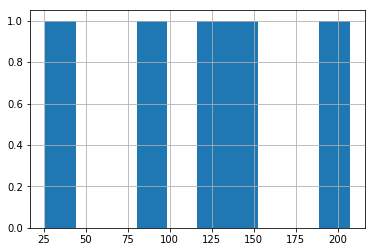

In [21]:
label_3 = out_df[out_df['label'] == 3]
label_3.index
df_label_3 = df[df.index.isin(label_3.index)]['classification'].value_counts()
df_label_3.hist()

In [22]:
label_4 = out_df[out_df['label'] == 4]
label_4.index
df_label_4 = df[df.index.isin(label_4.index)]['classification'].value_counts()
df_label_4.head()

A1            354
B             101
A              84
C              77
reconocido     16
Name: classification, dtype: int64

# Using mini batch K-means

In [6]:
from sklearn.cluster import MiniBatchKMeans

In [12]:
mini_kmeans = MiniBatchKMeans(n_clusters=5)

In [13]:
mini_kmeans = mini_kmeans.fit(X)

In [15]:
pred = mini_kmeans.predict(X)
out_df = pd.DataFrame({'label': pred})
out_df.head()

,label
0,4
1,4
2,4
3,4
4,2


In [24]:
out_df['label'].value_counts()

4    1725
1    1451
3     610
2     513
0     137
Name: label, dtype: int64

## Cluster 1

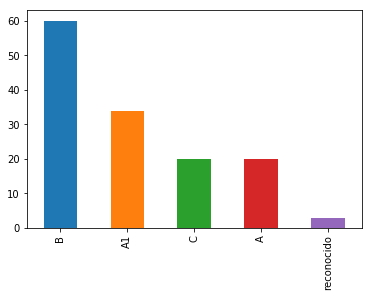

In [40]:
label_0 = out_df[out_df['label'] == 0]
label_0.index
df[df.index.isin(label_0.index)]['classification'].value_counts().plot.bar()

## Cluster 2

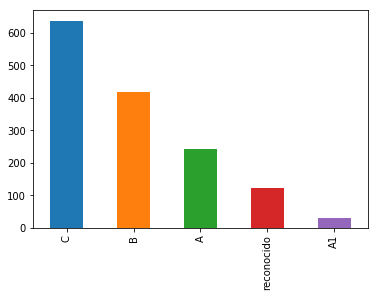

In [41]:
label_1 = out_df[out_df['label'] == 1]
label_1.index
df[df.index.isin(label_1.index)]['classification'].value_counts().plot.bar()

## Cluster 3

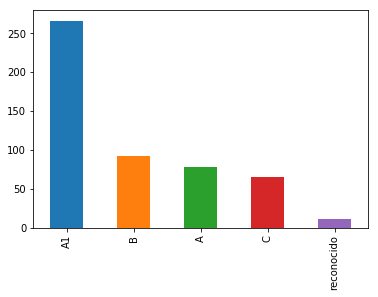

In [42]:
label_2 = out_df[out_df['label'] == 2]
label_2.index
df[df.index.isin(label_2.index)]['classification'].value_counts().plot.bar()

## Cluster 4

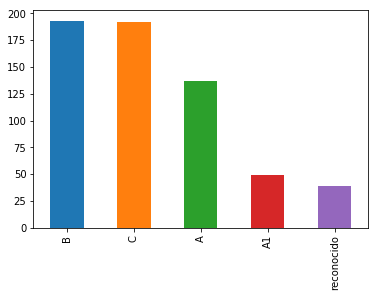

In [43]:
label_3 = out_df[out_df['label'] == 3]
label_3.index
df[df.index.isin(label_3.index)]['classification'].value_counts().plot.bar()

## Cluster 5

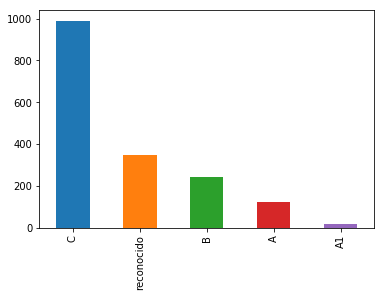

In [44]:
label_4 = out_df[out_df['label'] == 4]
label_4.index
df[df.index.isin(label_4.index)]['classification'].value_counts().plot.bar()

# Using T-SNE for visualize cluster

In [8]:
from sklearn.manifold import TSNE

In [49]:
model = TSNE(learning_rate=100, n_components=3)

In [50]:
transformed = model.fit_transform(X)

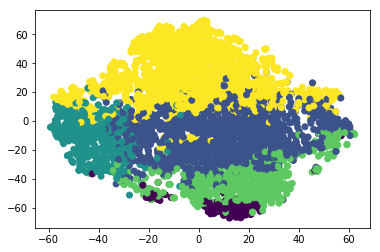

In [48]:
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]
z_axis = transformed
plt.scatter(x_axis, y_axis, c=out_df['label'])